In [1]:
import sys
import os
import numpy as np
# TEMPORARY FIX for KMP_DUPLICATE_LIB_OK error
os.environ['KMP_DUPLICATE_LIB_OK']='True'
current_dir = os.getcwd()
ROOT = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.append(ROOT)

from modules.solver.origami import RigidFoldableStructure
from modules.solver.kinematics import Kinematics
from modules.solver.util import pattern_visualizer, load_rfs_artifact_npz

c:\Python\repo_py\git\Simulator_for_RigidFoldableStructures-1\modules\solver\origami.py:130: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if self._check_winding_inconsistency(u, v, shared_edge) and conn_type is not "SOLDER" :


In [2]:
info = load_rfs_artifact_npz("../data/import/Thick_Origami/thick_miura.npz")
pattern = RigidFoldableStructure(
    vert=info["V"], edge=info["E"], face=info["F"], connection = info["C"])

[*] Loaded artifact <- ../data/import/Thick_Origami/thick_miura.npz
[*] Sheet Signs Generated: [1, 1, 1, 1]


(<Figure size 1000x800 with 1 Axes>,
 <Axes3D: title={'center': 'RFS Pattern Visualization'}, xlabel='X', ylabel='Y', zlabel='Z'>)

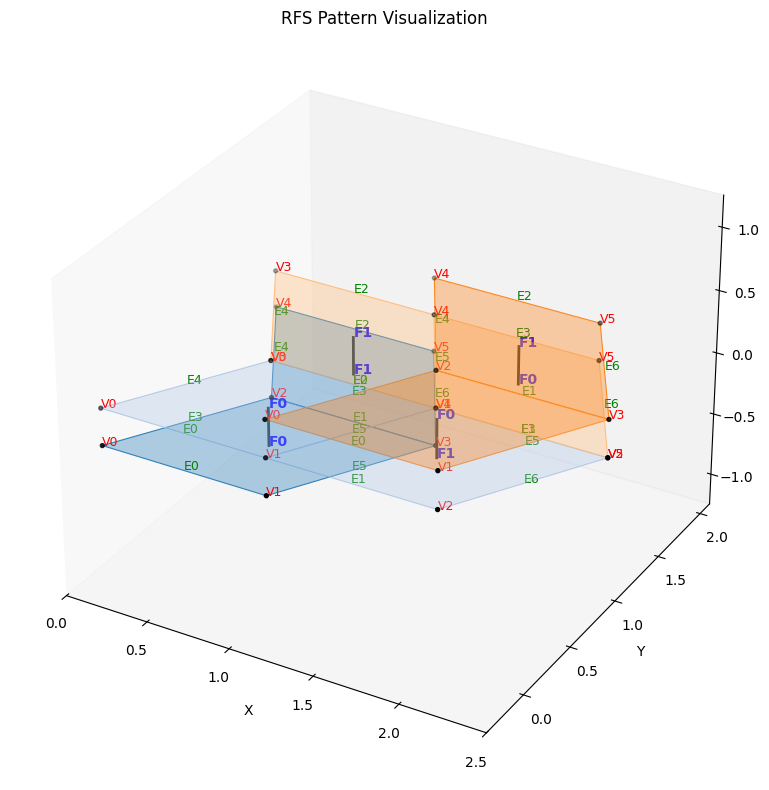

In [3]:
pattern_visualizer(pattern, sheets = 'all', show_vertices = True, show_edges = True, show_faces = True)

In [4]:
kinematics = Kinematics(pattern, k_raw = info["k_stiffness_raw"], 
                        theta_init_raw = info["theta_init_raw"], 
                        theta_equil_raw = info["theta_neutral_raw"], 
                        face_colors = info["face_colors"], reference_frame= info["reference_frame"])
kinematics.step_size_threshold = 1e-3
kinematics.residual_threshold = 1e-15
kinematics.init_step_size = np.pi/180
angle_history_raw = kinematics._find_equilibrium_trajectory()

Processed iteration 100/5000, c = 1.745e-02, max_diff(deg) = 29.39, dof = 1
Converged to equilibrium angles.


Processing 117 iterations and interpolating to 100 frames.
Exporting results... | fps: 30, play_speed: 1.0


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\pyvista\jupyter\notebook.py:36: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


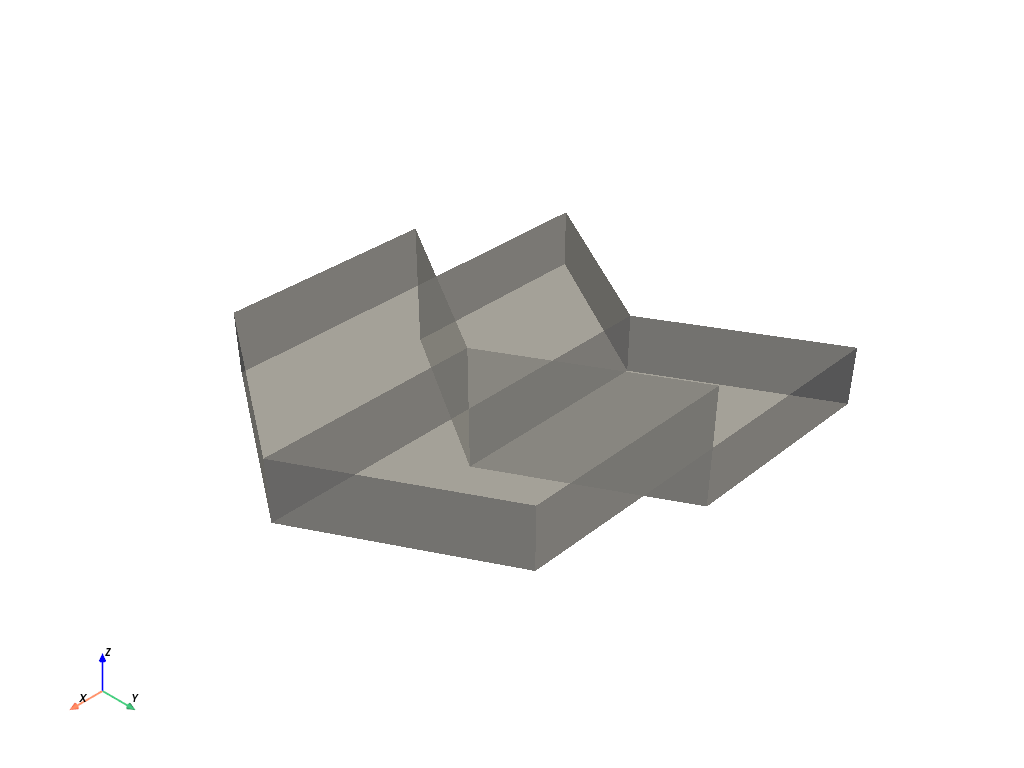

Done.


In [5]:
kinematics.num_interp_frames = 100
ply_path = '../data/visualization_result/Thick_Origami/thick_miura.vtp'
npy_path = '../data/visualization_result/Thick_Origami/thick_miura.npy'
gif_path = None # '../data/visualization_result/Thick_Origami/thick_miura.gif'
vtk_path = None # '../data/visualization_result/Thick_Origami/thick_miura_vtk'
kinematics.export_trajectory(ply_path=ply_path, npy_path=npy_path, gif_path=gif_path, vtk_path = vtk_path, show_base=True)